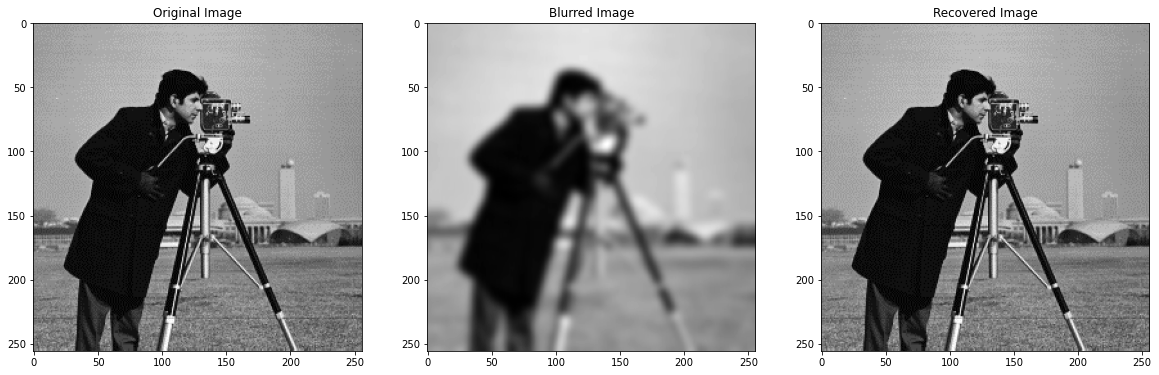

error_1 is 
 53.11022186279297
error_2 is 
 1.3029745427361952e-27


In [5]:
""" Image Restoration With Original Image """

# Inverse Filtering
from PIL import Image, ImageFilter
import numpy as np
import matplotlib.pyplot as plt
import cv2

ori = Image.open('cameraman.png')
blured = ori.filter(ImageFilter.GaussianBlur(3))
ori = np.array(ori)
blured.save('blured.png')
blured = np.array(blured)
mmse_1 = ( np . square (ori - blured )). mean ( axis = None )

img = cv2.imread('cameraman.png',cv2.IMREAD_GRAYSCALE)
imgblurr = cv2.imread('blured.png',cv2.IMREAD_GRAYSCALE)
imgfft = np.fft.fftshift (np.fft.fft2(img))
img_blurr_fft = np.fft.fftshift (np.fft.fft2(imgblurr))
H = img_blurr_fft / imgfft
G = 1/H
rec_fft = img_blurr_fft * G
rec_image = np.real(np.fft.ifft2(np.fft.fftshift(rec_fft)))
rec_nor_image = rec_image / np . max ( rec_image )
mmse_2 = ( np . square ( img - 255* rec_nor_image ) ). mean ( axis = None)
                                                             
fig = plt.figure(figsize = (20, 60))
fig.add_subplot(1,3,1)
plt.imshow(img,cmap="gray")
plt.title("Original Image")
fig.add_subplot(1,3,2)
plt.imshow(imgblurr,cmap="gray")
plt.title("Blurred Image")
fig.add_subplot(1,3,3)
plt.imshow(rec_image,cmap="gray")
plt.title("Recovered Image")
plt.show()

print ('error_1 is \n', mmse_1 )
print ('error_2 is \n', mmse_2 )


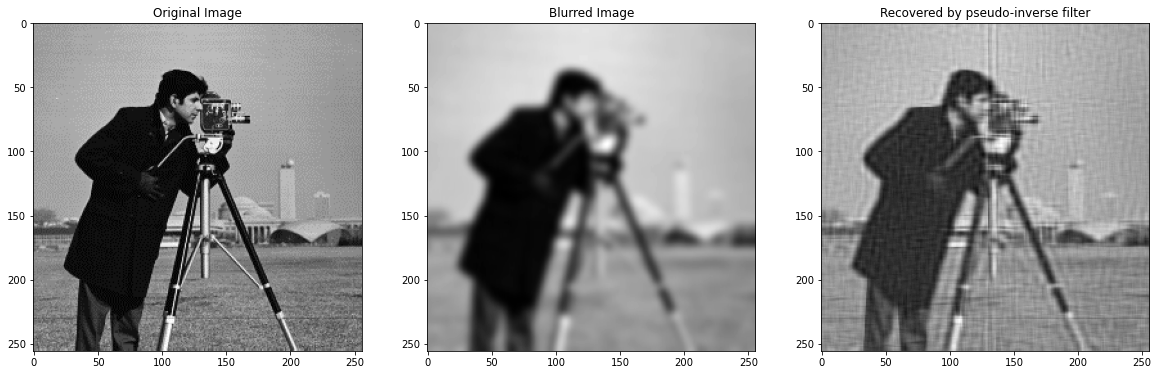

error_3 is 316.1258824875629


In [7]:
# Pseudo Inverse Filtering
th = 0.05
G_pse = np.empty(np.shape(G), dtype = complex)
G_pse[np.abs(H) >= th] = G[np.abs(H) >= th]
rec_fft_pse = img_blurr_fft * G_pse
rec_pse = np.real(np.fft.ifft2(np.fft.ifftshift(rec_fft_pse)))
rec_nor_pse = rec_pse / np . max ( rec_pse)
mmse_3 = (np . square (img - 255* rec_nor_pse)) . mean (axis = None)

fig = plt.figure(figsize = (20, 60))
fig.add_subplot(1,3,1)
plt.imshow(img, cmap = "gray")
plt.title("Original Image")
fig.add_subplot(1,3,2)
plt.imshow(imgblurr, cmap = "gray")
plt.title("Blurred Image")
fig.add_subplot(1,3,3)
plt.imshow(rec_nor_pse, cmap = "gray")
plt.title('Recovered by pseudo-inverse filter')
plt.show()

print ('error_3 is', mmse_3 )

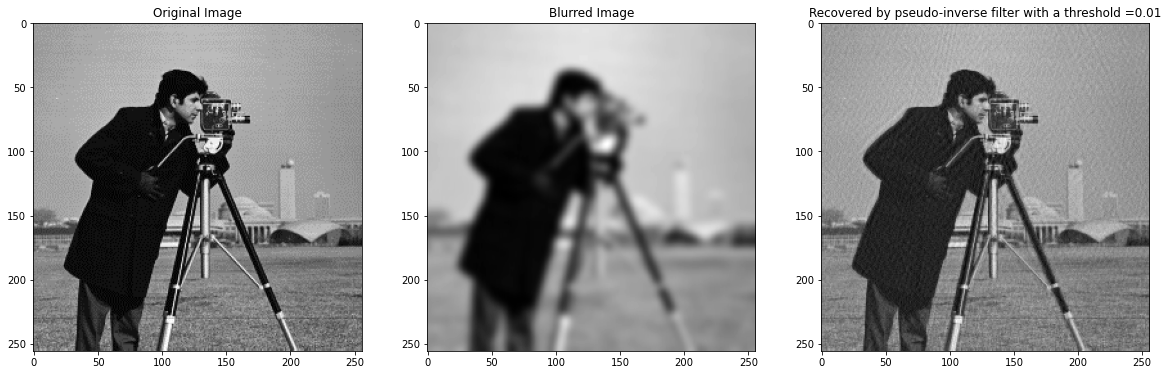

MMSE for th = 0.01 is 316.1258824875629



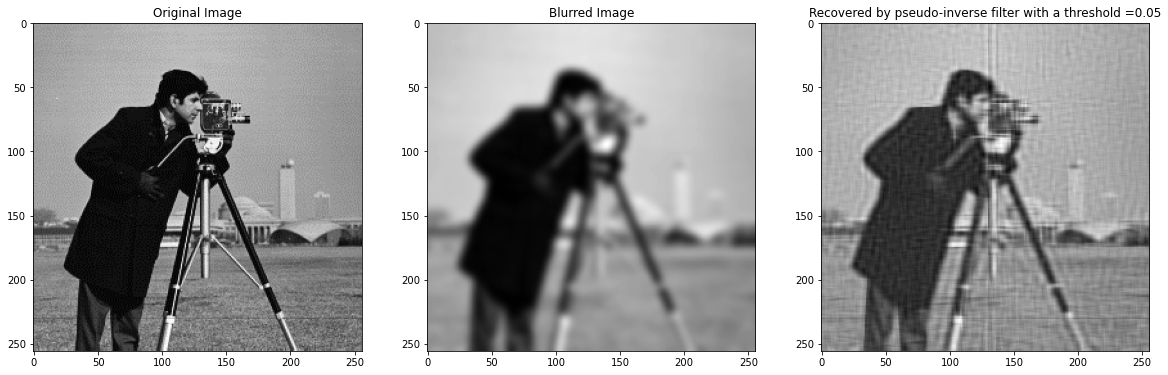

MMSE for th = 0.05 is 316.1258824875629



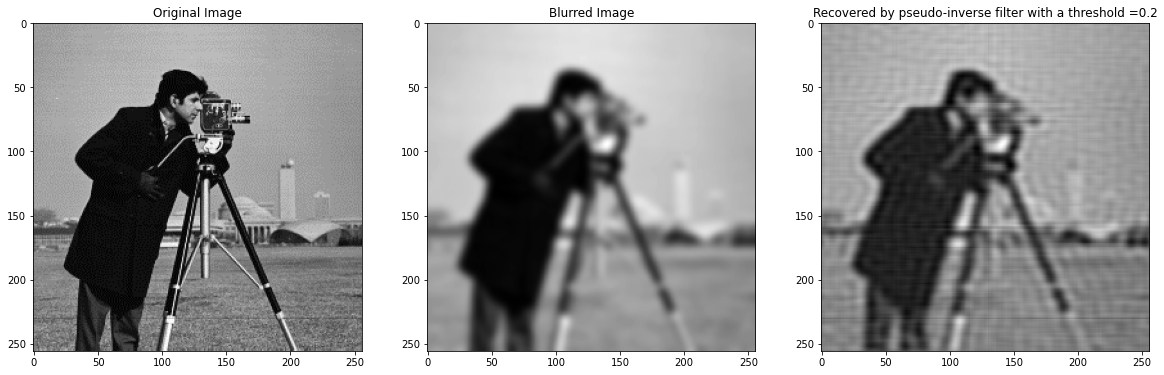

MMSE for th = 0.2 is 316.1258824875629



In [8]:
th = [0.01, 0.05, 0.2]
for i in range(len(th)) :
    G_pse = np.empty(np.shape(G), dtype = complex)
    G_pse[np.abs(H) >= th[i]] = G[np.abs(H) >= th[i]]
    rec_fft_pse = img_blurr_fft * G_pse
    rec_pse = np.real(np.fft.ifft2(np.fft.ifftshift(rec_fft_pse)))
    mmse_3 = (np . square (img - 255* rec_nor_pse)) . mean (axis = None)
    fig = plt.figure(figsize = (20, 60))
    fig.add_subplot(1,3,1)
    plt.imshow(img, cmap = "gray")
    plt.title("Original Image")
    fig.add_subplot(1,3,2)
    plt.imshow(imgblurr, cmap = "gray")
    plt.title("Blurred Image")
    fig.add_subplot(1,3,3)
    plt.imshow(rec_pse, cmap = "gray")
    plt.title(f'Recovered by pseudo-inverse filter with a threshold ={th[i]}')
    plt.show()
    print(f'MMSE for th = {th[i]} is {mmse_3}\n')

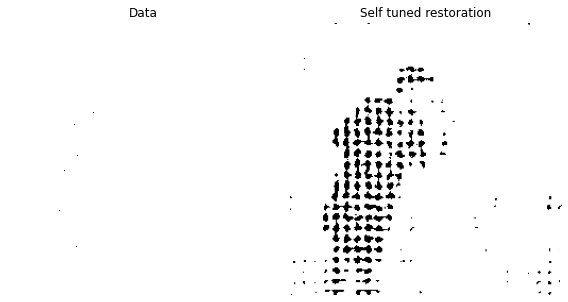

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import color, data, restoration

rng = np.random.default_rng()

CM = cv2.imread('blured.png', cv2.IMREAD_GRAYSCALE)

from scipy.signal import convolve2d as conv2
psf = np.ones((10, 10))
#psf = np.array([ 1, 1, 1, 1,  2,  1, 1, 1, 1]).reshape(3,3)
CM = conv2(CM, psf, 'same')
CM += 0.1 * CM.std() * rng.standard_normal(CM.shape)

deconvolved, _ = restoration.unsupervised_wiener(CM, psf)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5),
                       sharex=True, sharey=True)

plt.gray()

ax[0].imshow(CM, vmin = deconvolved.min(), vmax=deconvolved.max())
ax[0].axis('off')
ax[0].set_title('Data')

ax[1].imshow(deconvolved)
ax[1].axis('off')
ax[1].set_title('Self tuned restoration')

fig.tight_layout()

plt.show()
